# Packages inladen

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # Voor het verwerken van alle data
import numpy as np # Voor alle numerieke operaties
import sklearn # De library met Machine Learning technieken
import matplotlib.pyplot as plt # Visualisatie tool

# Data exploration

In [2]:
# Het inladen van tabellen. Dit wordt gezet in een "DataFrame"
df = pd.read_csv("../3dprinter/data.csv", sep = ';')
df.head(7)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7
5,0.02,10,40,1,200,60,40,1,0,60,24,1.1
6,0.02,5,10,0,205,65,40,1,25,55,12,1.3


In [3]:
# Onze afhankelijke waarde is de kolom "materiaal"
Y = df.material

#Onze voorspellers moet het materiaal gaan voorspellen. We willen niet dat we het materiaal als gegeven zien. Dan wordt het wel heel makkelijk!
X = df.drop("material", axis = 1)

X.head() # Hier zien we dat de infill pattern 1 en 0 zijn geworden. En de kolom material staat er niet meer in

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,25,18,1.2
1,0.02,7,90,1,225,65,40,25,32,16,1.4
2,0.02,1,80,0,230,70,40,50,40,8,0.8
3,0.02,4,70,1,240,75,40,75,68,10,0.5
4,0.02,6,90,0,250,80,40,100,92,5,0.7


In [4]:
# Y is nu een "Series" met 1 en 0 voor "abs" en "pla".
Y.head(7)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: material, dtype: int64

# Making a model

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 2)

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [8]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0], dtype=int64)

0.84


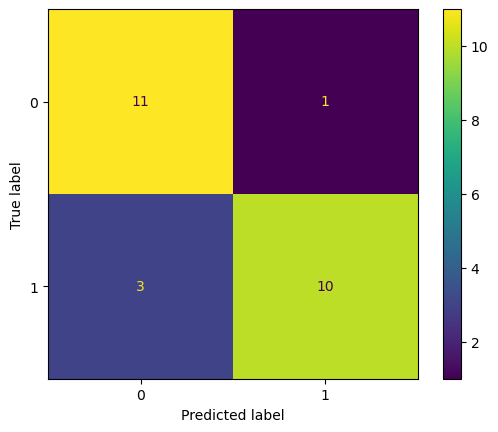

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

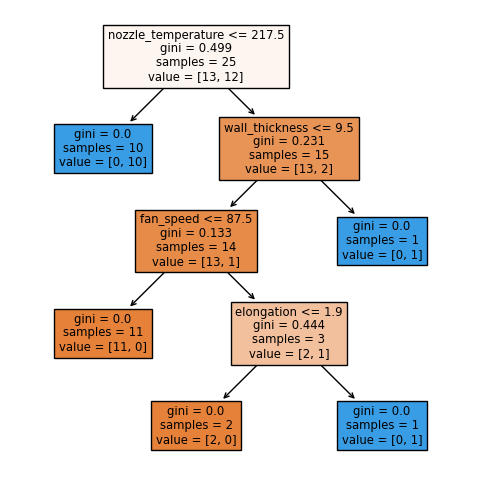

In [10]:
fig = plt.figure(figsize = (6, 6))
plot_tree(clf, filled=True, feature_names = list(x_train.columns.values))
plt.show()

In [11]:
import pickle
s = pickle.dumps(clf)
with open("decision_tree.sav", "wb") as f:
    f.write(s)

In [12]:
import pickle
with open("decision_tree.sav", "rb") as f:
    clf_ = pickle.load(f)
clf_

DecisionTreeClassifier(random_state=42)